In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### NOTE: please read the conclusion part for theoritical understanding

In [5]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
#cheking nulls

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#defined function for cheking zeros 

def checkzero(df):
    print((df== 0).astype(int).sum(axis=0))

In [7]:
checkzero(data)

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# data is balaced or not?

data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### THIS IS HIGHLY IMBALANCE DATASET AS ONLY ~500 RECORDS BELONG TO CLASS 1

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### observations



### heatmap

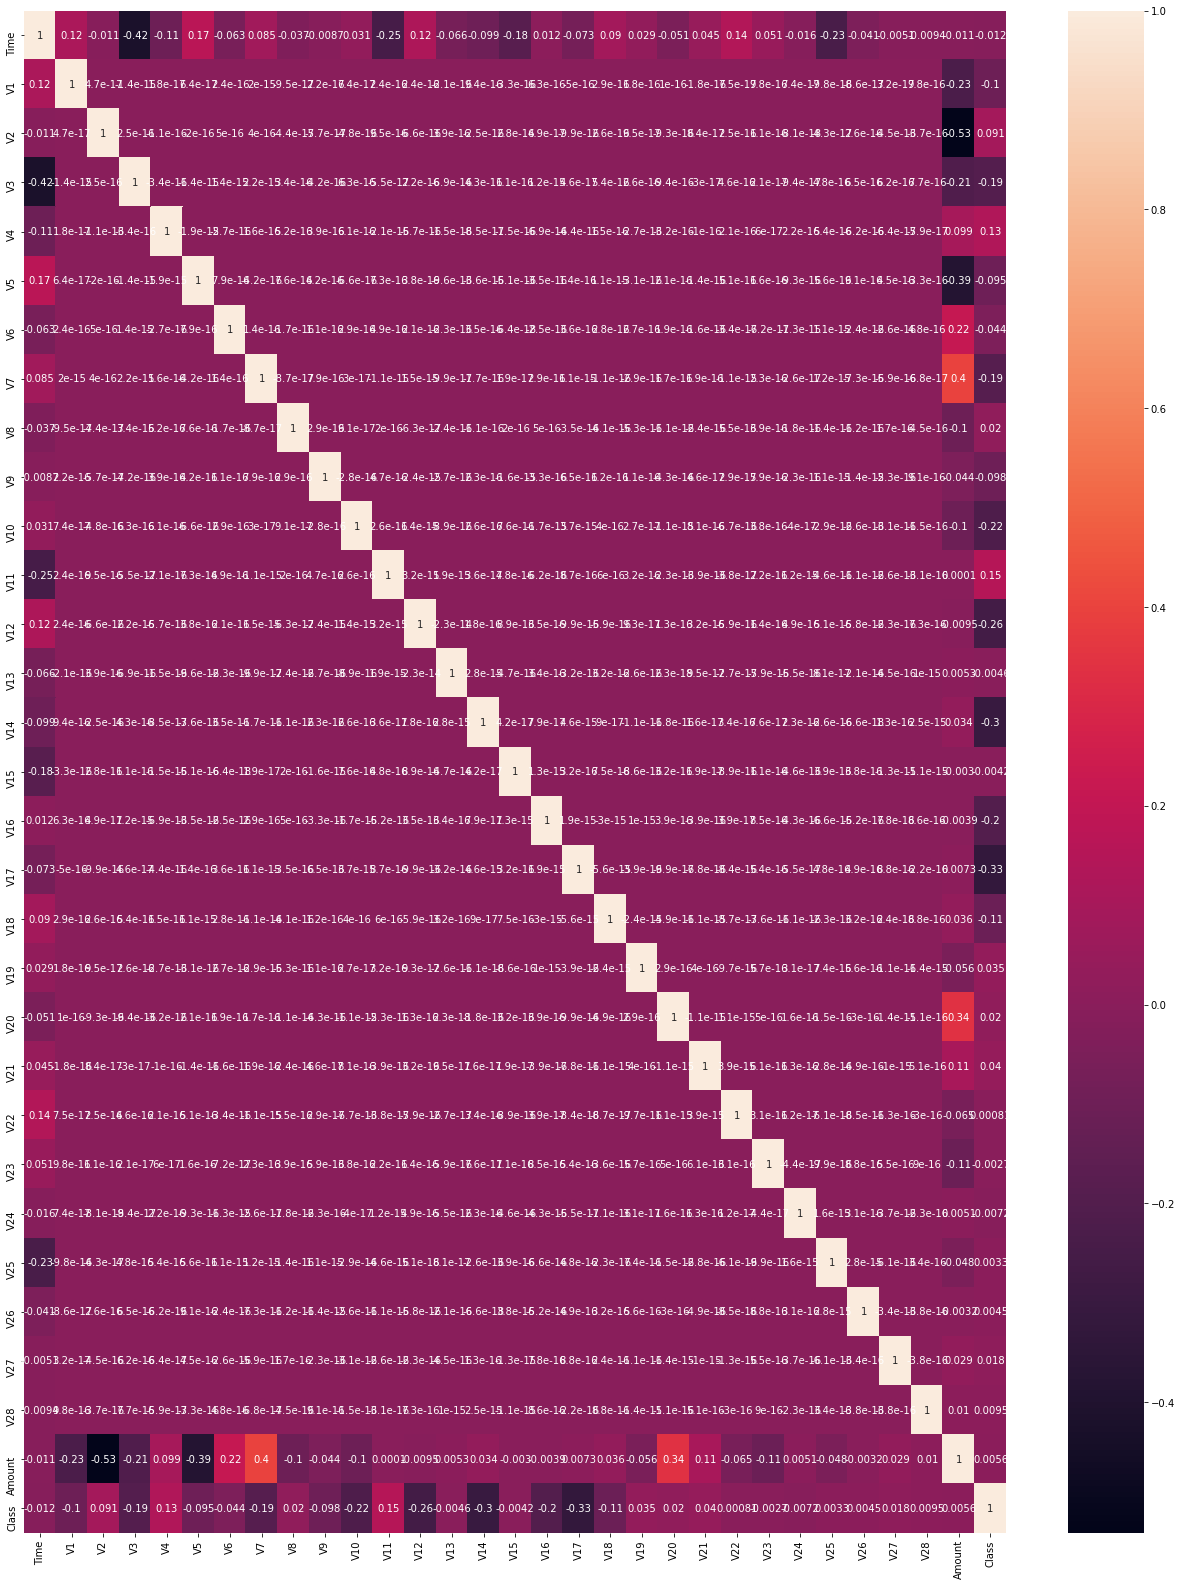

In [11]:
plt.figure(figsize=(22,28))
sns.heatmap(data.corr(),annot=True)

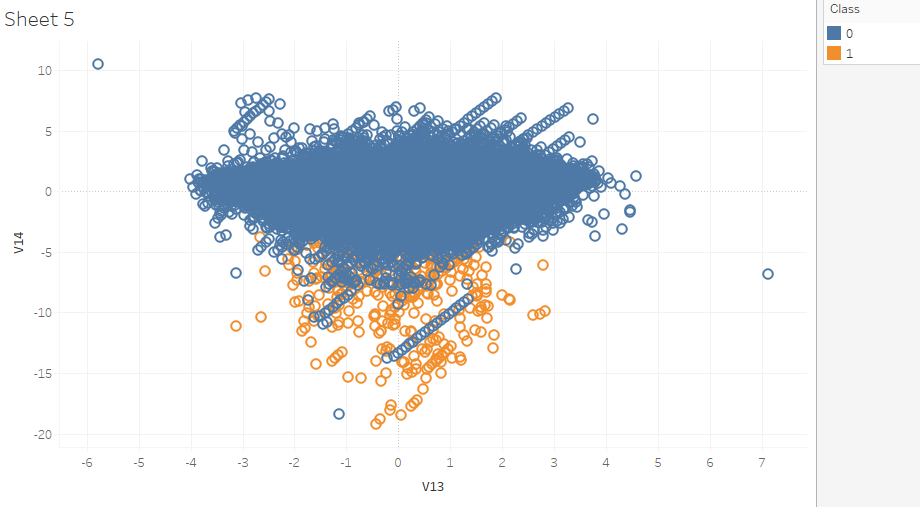

In [1]:
from IPython.display import Image
Image(filename='GRAPH1.PNG')

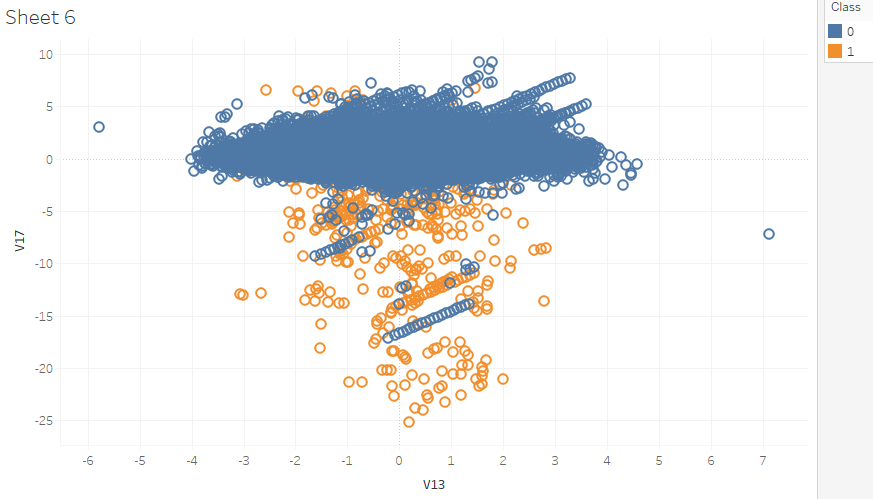

In [2]:
from IPython.display import Image
Image(filename='GRAPH2.PNG')

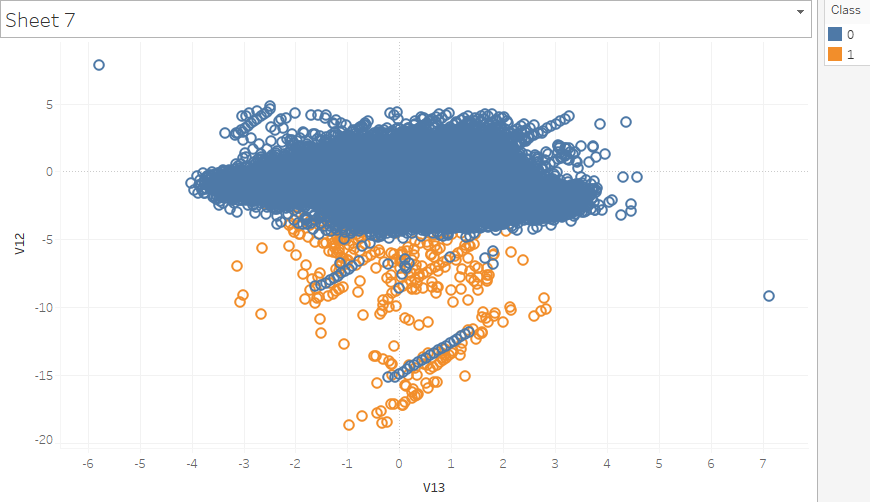

In [3]:
from IPython.display import Image
Image(filename='GRAPH3.PNG')

### From above graph we can clearly get the seperrate pettern for that fraud transactions

<ipython-input-29-7a77fb7ac452>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-29-7a77fb7ac452>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-29-7a77fb7ac452>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-29-7a77fb7ac452>:2: RuntimeW

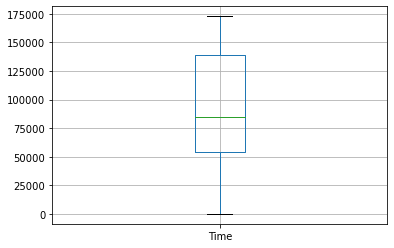

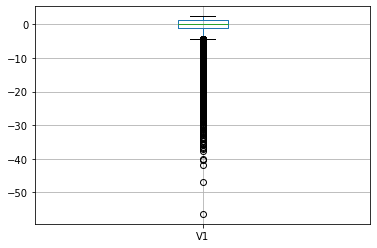

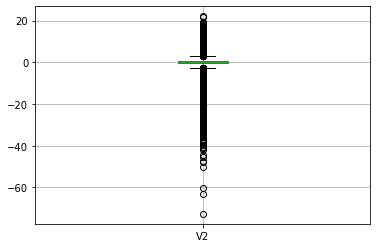

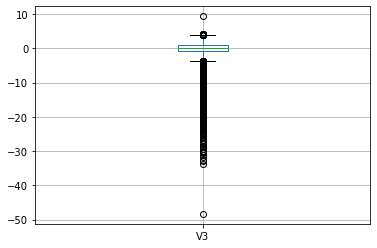

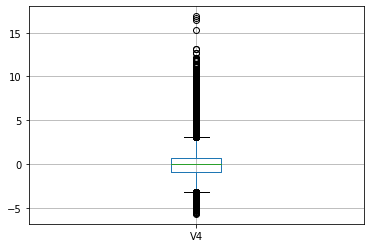

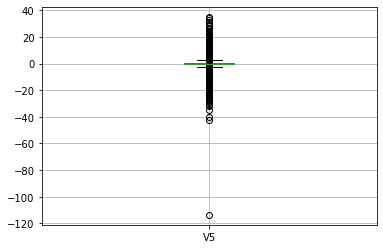

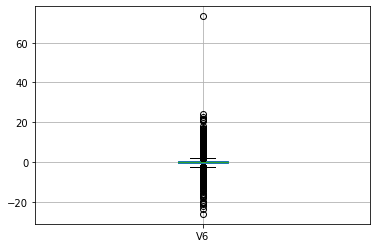

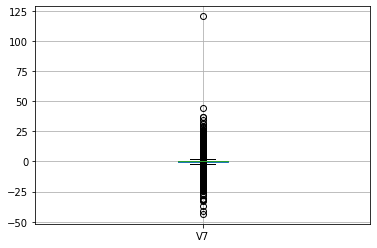

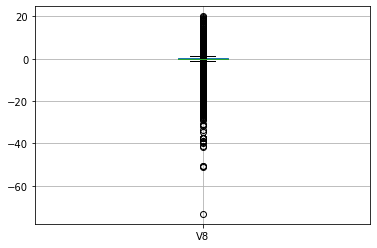

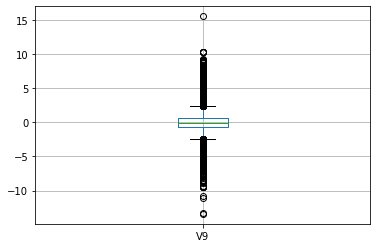

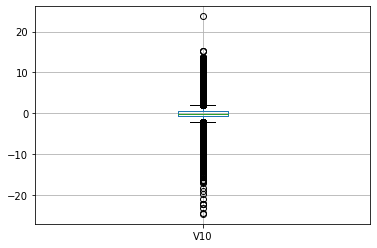

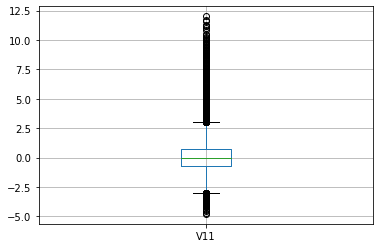

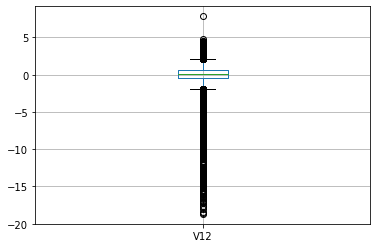

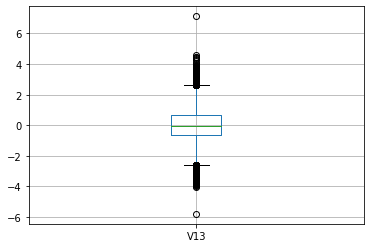

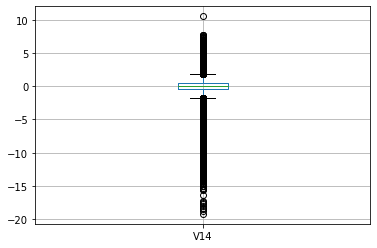

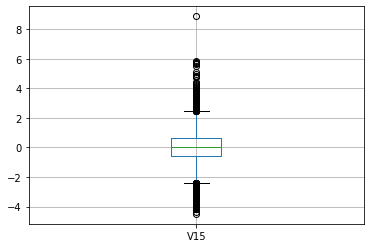

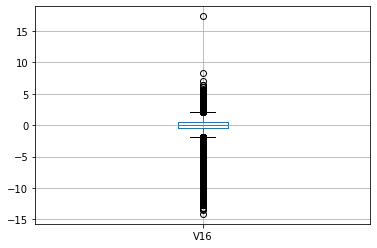

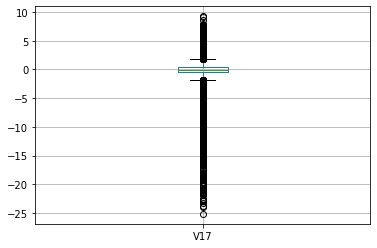

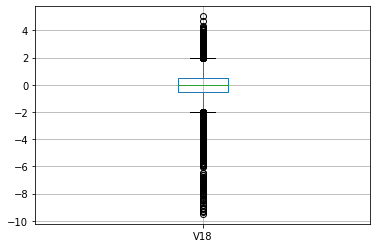

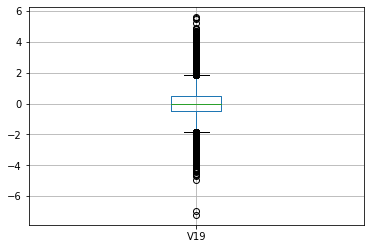

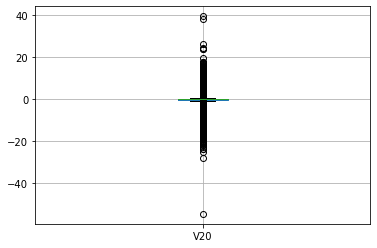

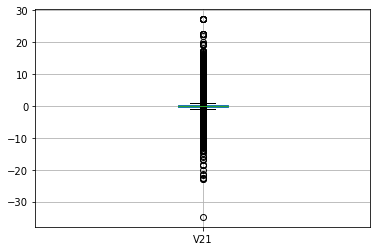

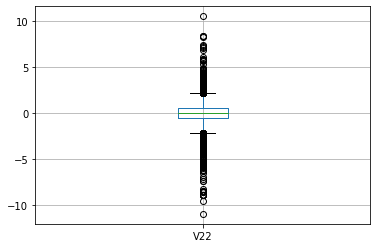

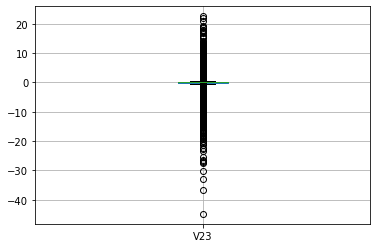

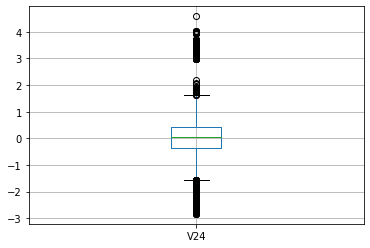

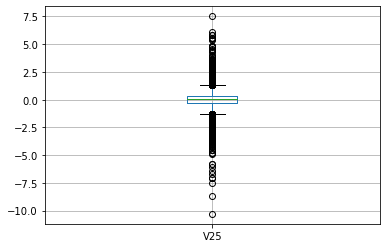

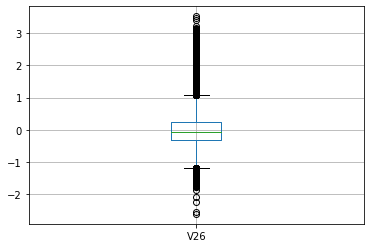

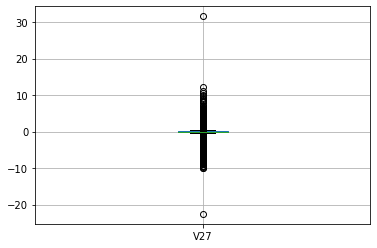

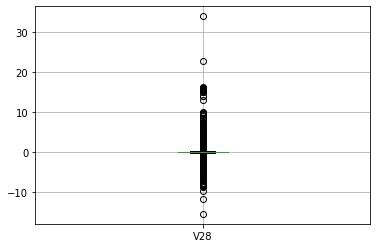

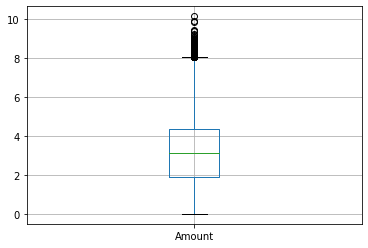

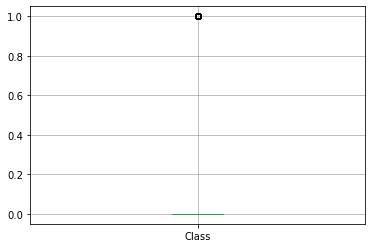

In [29]:
for i in data.columns:
    plt.figure()
    data.boxplot([i])

histogram of:Time
histogram of:V1
histogram of:V2
histogram of:V3
histogram of:V4
histogram of:V5
histogram of:V6
histogram of:V7
histogram of:V8
histogram of:V9
histogram of:V10
histogram of:V11
histogram of:V12
histogram of:V13
histogram of:V14
histogram of:V15
histogram of:V16
histogram of:V17
histogram of:V18
histogram of:V19
histogram of:V20


<ipython-input-36-b6dc4bf5324a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


histogram of:V21
histogram of:V22
histogram of:V23
histogram of:V24
histogram of:V25
histogram of:V26
histogram of:V27
histogram of:V28
histogram of:Amount
histogram of:Class


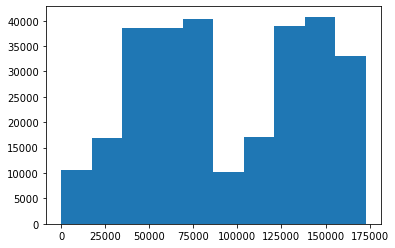

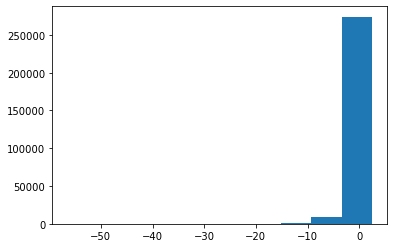

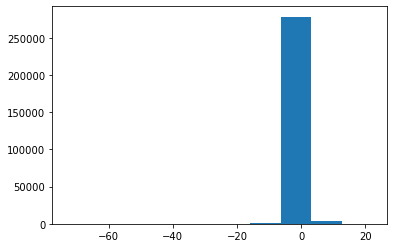

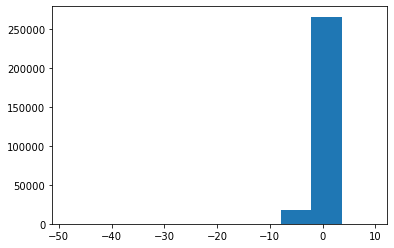

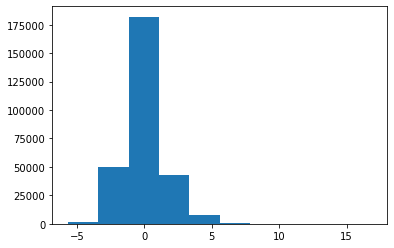

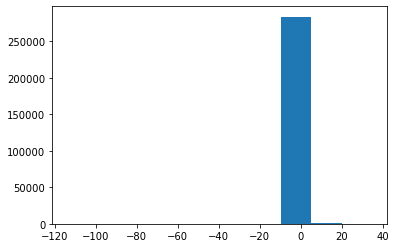

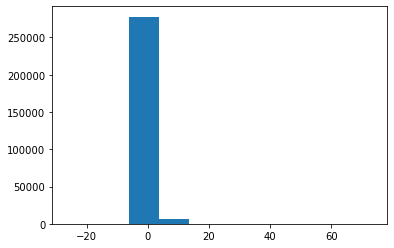

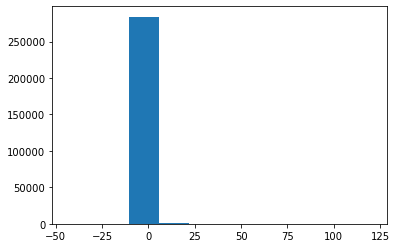

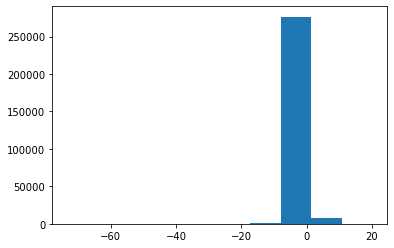

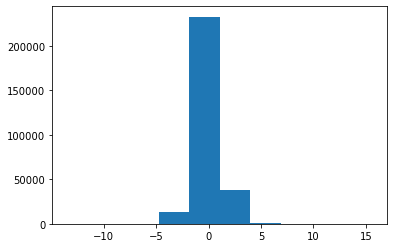

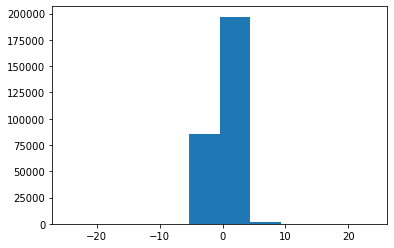

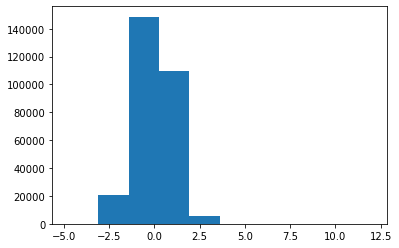

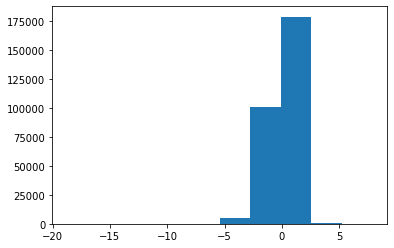

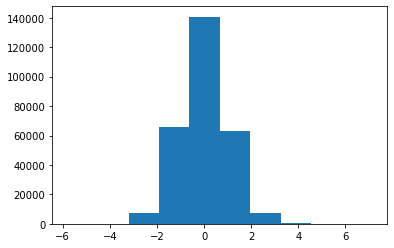

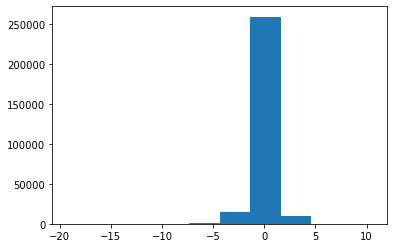

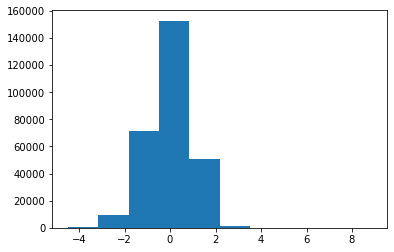

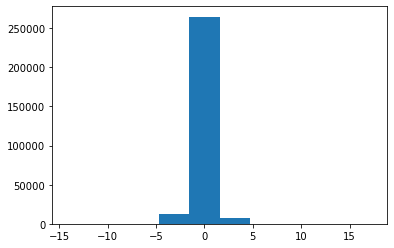

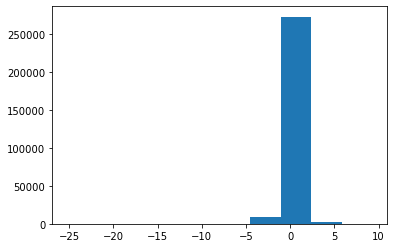

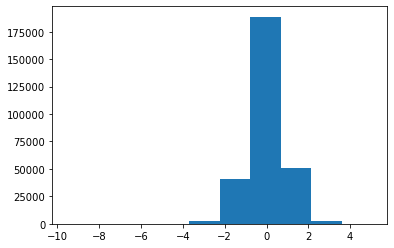

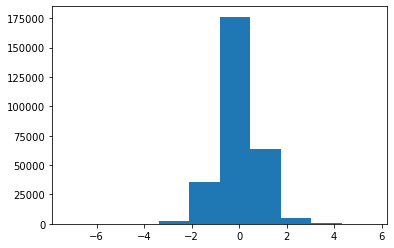

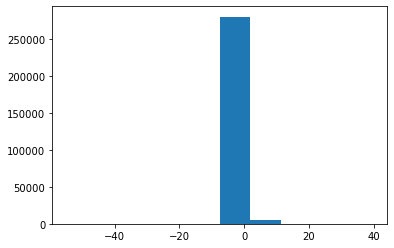

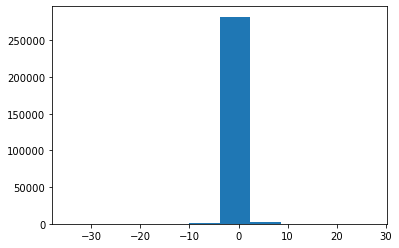

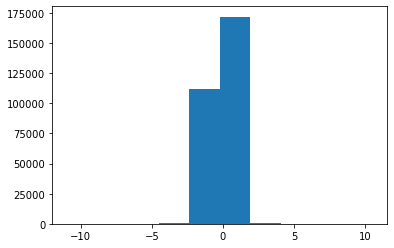

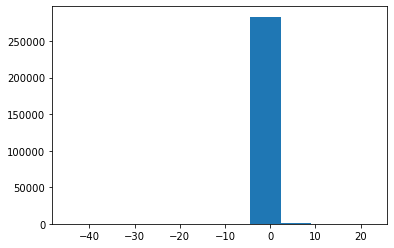

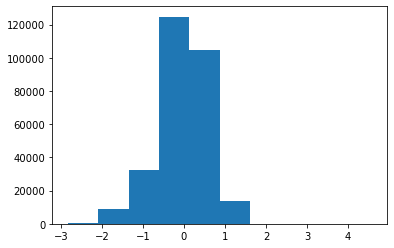

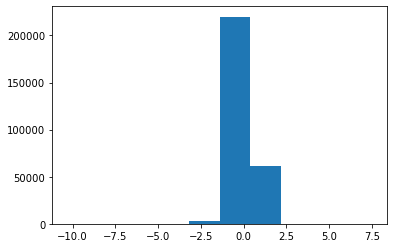

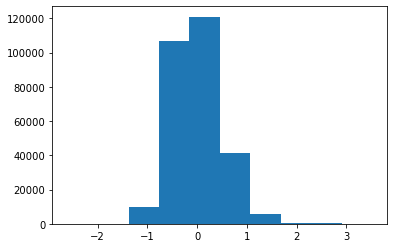

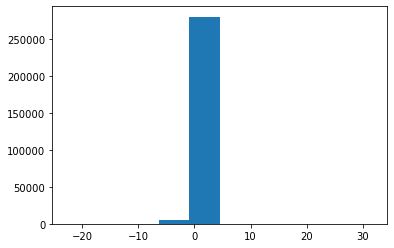

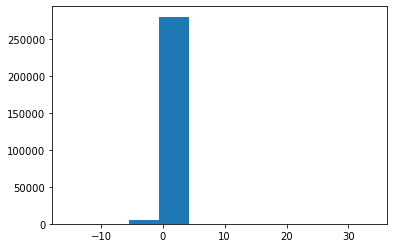

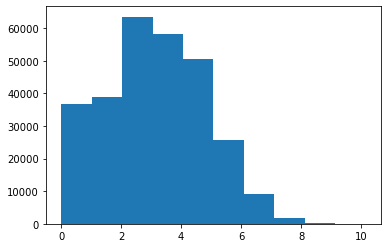

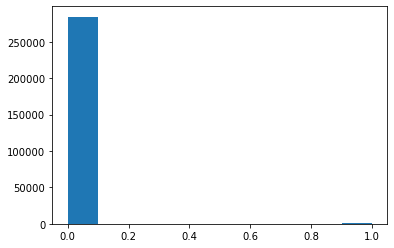

In [36]:
for i in data.columns:
    print("histogram of:"+ i)
    plt.figure()
    #data.plot([i])
    
    plt.hist(data[i])
    

In [11]:
#check skewness of all numeric columns

from scipy.stats import kurtosis
from scipy.stats import skew


data_skewed = data.apply(lambda x:skew(x))
data_skewed

Time      -0.035567
V1        -3.280650
V2        -4.624841
V3        -2.240144
V4         0.676289
V5        -2.425889
V6         1.826571
V7         2.553894
V8        -8.521899
V9         0.554677
V10        1.187134
V11        0.356504
V12       -2.278389
V13        0.065233
V14       -1.995165
V15       -0.308421
V16       -1.100960
V17       -3.844894
V18       -0.259879
V19        0.109191
V20       -2.037145
V21        3.592972
V22       -0.213256
V23       -5.875109
V24       -0.552496
V25       -0.415790
V26        0.576690
V27       -1.170203
V28       11.192032
Amount    16.977635
Class     23.997453
dtype: float64

In [6]:
data["Amount"] = np.log1p(data["Amount"])

In [13]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539,0


### Feature Selection Technique

#### Extra Tree Calssifier

In [7]:
#split the data

X = data.iloc[:,:-1]
Y = data.iloc[:,-1] 

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

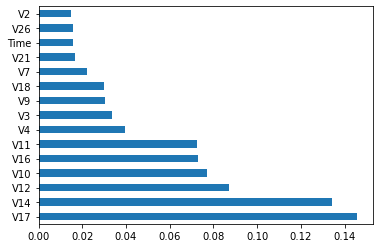

In [22]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

#### Information Gain

In [24]:
from sklearn.feature_selection import mutual_info_classif

In [25]:
mutual_info=mutual_info_classif(X,Y)

In [28]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False).head(15)

V17    0.008258
V14    0.008136
V12    0.007601
V10    0.007530
V11    0.006831
V16    0.006144
V4     0.004976
V3     0.004952
V18    0.004317
V9     0.004277
V7     0.003951
V2     0.003228
V21    0.002452
V27    0.002444
V5     0.002389
dtype: float64

#### Important features

###### V17, V14, V12, V10, V11, V16, V4, V3, V18, V9, V7, V2, V21

In [8]:
# ADD only top 5 important fetures to reduced dimentionality 

df = data[[ 'V10', 'V12', 'V14', 'V16', 'V17','Class']]

In [9]:
df.head()

,V10,V12,V14,V16,V17,Class
0,0.090794,-0.617801,-0.311169,-0.470401,0.207971,0
1,-0.166974,1.065235,-0.143772,0.463917,-0.114805,0
2,0.207643,0.066084,-0.165946,-2.890083,1.109969,0
3,-0.054952,0.178228,-0.287924,-1.059647,-0.684093,0
4,0.753074,0.538196,-1.119670,-0.451449,-0.237033,0


In [10]:
#split the data

X = df.iloc[:,:-1]
Y = df.iloc[:,-1] 

#### data scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [12]:
X = pd.DataFrame(x_scaled)

In [13]:
X.head()

,0,1,2,3,4
0,0.083386,-0.618296,-0.324610,-0.536833,0.244863
1,-0.153350,1.066089,-0.149982,0.529434,-0.135170
2,0.190700,0.066137,-0.173114,-3.298235,1.306868
3,-0.050468,0.178371,-0.300360,-1.209296,-0.805445
4,0.691625,0.538627,-1.168034,-0.515205,-0.279081


In [14]:
# sampling

from sklearn.model_selection import train_test_split

cr_x_train,cr_x_test,cr_y_train,cr_y_test = train_test_split(X,Y,test_size = .3,random_state = 4, stratify = Y)

In [15]:
cr_y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [16]:
cr_y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

##### OVER SAMPLING TO OVERCOME THE DATA IMBALANCE PROBLEM

In [17]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

In [19]:
# Over sampling Technique

ost=RandomOverSampler(0.2)
X_train_ost,y_train_ost=ost.fit_sample(cr_x_train,cr_y_train)
print("The number of classes before fit {}".format(Counter(cr_y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ost)))

C:\Users\jayhi\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199020, 1: 344})
The number of classes after fit Counter({0: 199020, 1: 39804})


In [20]:
# SMOTE TECHNIQUE

smt=SMOTETomek(0.2)
X_train_smt,y_train_smt = smt.fit_sample(cr_x_train,cr_y_train)
print("The number of classes before fit {}".format(Counter(cr_y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

C:\Users\jayhi\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199020, 1: 344})
The number of classes after fit Counter({0: 198998, 1: 39782})


In [22]:
# Under sampling Technique

ust=RandomUnderSampler(0.6)
X_train_ust,y_train_ust=ust.fit_sample(cr_x_train,cr_y_train)
print("The number of classes before fit {}".format(Counter(cr_y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ust)))

The number of classes before fit Counter({0: 199020, 1: 344})
The number of classes after fit Counter({0: 573, 1: 344})


C:\Users\jayhi\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.6 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


### MODEL BUILDING

###### Logistic Regression

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
# logistic regression 

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(cr_x_train, cr_y_train)
print("Model Fitted Successfully!!!")

pred_lg = lg.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_lg)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_lg))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85274    21]
 [   51    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.66      0.73       148

    accuracy                           1.00     85443
   macro avg       0.91      0.83      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
# logistic regression with under sampling

from sklearn.linear_model import LogisticRegression

lgu= LogisticRegression()

lgu.fit(X_train_ust,y_train_ust)
print("Model Fitted Successfully!!!")

pred_lgu = lgu.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_lgu)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_lgu))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[84623   672]
 [   27   121]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.82      0.26       148

    accuracy                           0.99     85443
   macro avg       0.58      0.90      0.63     85443
weighted avg       1.00      0.99      0.99     85443



In [26]:
# logistic regression with over sampling

from sklearn.linear_model import LogisticRegression

lgo = LogisticRegression()

lgo.fit(X_train_ost,y_train_ost)
print("Model Fitted Successfully!!!")

pred_lgo = lgo.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_lgo)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_lgo))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85075   220]
 [   27   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.35      0.82      0.49       148

    accuracy                           1.00     85443
   macro avg       0.68      0.91      0.75     85443
weighted avg       1.00      1.00      1.00     85443



#### Decision tree

In [27]:
# Decision tree 

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 15)


dtree.fit(cr_x_train, cr_y_train)
print("Model Fitted Successfully!!!")

pred_dtree = dtree.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_dtree)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_dtree))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85266    29]
 [   35   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.76      0.78       148

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [28]:
# Decision tree (over sampling)

from sklearn.tree import DecisionTreeClassifier
dtree_os = DecisionTreeClassifier(max_depth = 15)


dtree_os.fit(X_train_ost,y_train_ost)
print("Model Fitted Successfully!!!")

pred_dtree_os = dtree_os.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_dtree_os)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_dtree_os))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85237    58]
 [   29   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.67      0.80      0.73       148

    accuracy                           1.00     85443
   macro avg       0.84      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
# Decision tree (under sampling)

from sklearn.tree import DecisionTreeClassifier
dtree_us = DecisionTreeClassifier(max_depth = 15)


dtree_us.fit(X_train_ust,y_train_ust)
print("Model Fitted Successfully!!!")

pred_dtree_us = dtree_us.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_dtree_us)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_dtree_us))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[79341  5954]
 [   22   126]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85295
           1       0.02      0.85      0.04       148

    accuracy                           0.93     85443
   macro avg       0.51      0.89      0.50     85443
weighted avg       1.00      0.93      0.96     85443



#### Random forest

In [30]:
# random forest 

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500,max_depth = 10)


rfc.fit(cr_x_train, cr_y_train)
print("Model Fitted Successfully!!!")

pred_rfc = rfc.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_rfc)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_rfc))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85283    12]
 [   30   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.80      0.85       148

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



#### AUROC CURVE

Random Forest: ROC AUC=0.953
No Skills: ROC AUC=0.500


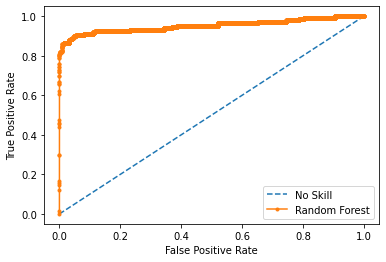

In [32]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

rf_probs = rfc.predict_proba(cr_x_test)
ns_probs = [0 for _ in range(len(cr_y_test))]
rf_probs= rf_probs[:,1]

rf_auc = roc_auc_score(cr_y_test, rf_probs)
ns_auc = roc_auc_score(cr_y_test, ns_probs)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('No Skills: ROC AUC=%.3f' % (ns_auc))

ns_fpr, ns_tpr, _ = roc_curve(cr_y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(cr_y_test, rf_probs)

# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [93]:
# random forest (OS)

from sklearn.ensemble import RandomForestClassifier
rfc_os = RandomForestClassifier(max_depth = 10)


rfc_os.fit(X_train_ost,y_train_ost)
print("Model Fitted Successfully!!!")

pred_rfc_os = rfc_os.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_rfc_os)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_rfc_os))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85269    26]
 [   30   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.80      0.81       148

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



#### Ada Boosting

In [88]:
# ada boosting

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 25)


abc.fit(cr_x_train, cr_y_train)
print("Model Fitted Successfully!!!")

pred_abc = abc.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_abc)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_abc))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85261    34]
 [   33   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.78      0.77       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



#### GB

In [89]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


gbc.fit(cr_x_train, cr_y_train)
print("Model Fitted Successfully!!!")

pred_gbc = gbc.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_gbc)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_gbc))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85278    17]
 [  101    47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.32      0.44       148

    accuracy                           1.00     85443
   macro avg       0.87      0.66      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [90]:
# Gradient Boosting (OS)

from sklearn.ensemble import GradientBoostingClassifier
gbc_o = GradientBoostingClassifier()


gbc_o.fit(X_train_ost,y_train_ost)
print("Model Fitted Successfully!!!")

pred_gbc_o = gbc_o.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_gbc_o)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_gbc_o))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85113   182]
 [   25   123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.40      0.83      0.54       148

    accuracy                           1.00     85443
   macro avg       0.70      0.91      0.77     85443
weighted avg       1.00      1.00      1.00     85443



#### SVM

In [92]:
from sklearn.svm import SVC
svc=SVC()


svc.fit(cr_x_train, cr_y_train)
print("Model Fitted Successfully!!!")

pred_svc = svc.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_svc)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_svc))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[85290     5]
 [   44   104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.70      0.81       148

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [95]:
from sklearn.svm import SVC
svc_os=SVC()


svc_os.fit(X_train_ost,y_train_ost)
print("Model Fitted Successfully!!!")

pred_svc_os = svc_os.predict(cr_x_test)
print("data predicted Successfully!!!")

tab = confusion_matrix(cr_y_test,pred_svc_os)
print("Confusion Matrix:\n",tab)

# evaluate predictions

print(classification_report(cr_y_test,pred_svc_os))

Model Fitted Successfully!!!
data predicted Successfully!!!
Confusion Matrix:
 [[84904   391]
 [   23   125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.24      0.84      0.38       148

    accuracy                           1.00     85443
   macro avg       0.62      0.92      0.69     85443
weighted avg       1.00      1.00      1.00     85443



### CONCLUSION

- As can be seen in visualization part- feature V12, V14, V17 could well seperate the target variable classes (0 and 1)
- While model building random forest is giving best result if we consider all the evolution mertics such as accuracy, precision, recall, f-1 score of both classes.
- Here, FP (False Poitive Result) is very important and should be less beacuse - FP mean that falsely predicted as NOT FRAUD (which is dangerous). So, precision is the important metrics here.